Recommending movies to user where the other users possess similarity based on ratings of the movies using Recommendation Engine Algorithm

* Recommendation Engine
* Collaborative Filtering
* Cosine Similarity

In [1]:
import pandas as pd #Dataframe Manipulation library
import numpy as np #Data Manipulation library

#sklearn modules Collaborative Filtering

#Libraries for Plotting 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)
sns.set_style('white')

#### Loading the dataset 
##### *having details of movie ratings from MovieLens datasets*

In [2]:
column_names = ['User_ID','Movie_ID','Rating','Timestamp']
info_df = pd.read_csv('../input/movie-recommendation-dataset/u.data', sep = '\t', names = column_names)

In [3]:
info_df.head()

,User_ID,Movie_ID,Rating,Timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [4]:
#Descriptive statistics of the dataset
info_df.describe()

,User_ID,Movie_ID,Rating,Timestamp
count,100003.000000,100003.000000,100003.000000,1.000030e+05
mean,462.470876,425.520914,3.529864,8.835288e+08
std,266.622454,330.797791,1.125704,5.343791e+06
min,0.000000,1.000000,1.000000,8.747247e+08
25%,254.000000,175.000000,3.000000,8.794487e+08
50%,447.000000,322.000000,4.000000,8.828269e+08
75%,682.000000,631.000000,4.000000,8.882600e+08
max,943.000000,1682.000000,5.000000,8.932866e+08


*The dataset has 1,00,000 ratings given by 943 users for 1682 movies on a scale of 1 to 5*

#### Loading the dataset 
##### *having movie titles from MovieLens datasets*

In [5]:
movie_title_df = pd.read_csv("../input/movie-recommendation-dataset/Movie_Id_Titles")
movie_title_df.rename(columns = {'item_id':'Movie_ID', 'title':'Movie_Title'}, inplace = True)
movie_title_df.head()

,Movie_ID,Movie_Title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


*Merging the datasets*

In [6]:
info_df = pd.merge(info_df,movie_title_df, on='Movie_ID')

In [7]:
print(info_df.head())
print(f"\n Size of the rating_df dataset is {info_df.shape}")

   User_ID  Movie_ID  Rating  Timestamp       Movie_Title
0        0        50       5  881250949  Star Wars (1977)
1      290        50       5  880473582  Star Wars (1977)
2       79        50       4  891271545  Star Wars (1977)
3        2        50       5  888552084  Star Wars (1977)
4        8        50       5  879362124  Star Wars (1977)

 Size of the rating_df dataset is (100003, 5)


##### Exploring the data

In [8]:
info_df.groupby('Movie_Title')['Rating'].mean().sort_values(ascending = False).head()
#Group By combines similar values in a given column, col1, 
#col2 to aggregate the values of col1 to the level of now the unique values of dataframe
#and using mean to perform aggregation and sort them in descending order

Movie_Title
They Made Me a Criminal (1939)                5.0
Marlene Dietrich: Shadow and Light (1996)     5.0
Saint of Fort Washington, The (1993)          5.0
Someone Else's America (1995)                 5.0
Star Kid (1997)                               5.0
Name: Rating, dtype: float64

*Top 5 **Highly rated** movies     
The movies are grouped based on the average ratings for given a movie by multiple users*

In [9]:
info_df.groupby('Movie_Title')['Rating'].count().sort_values(ascending = False).head()

Movie_Title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: Rating, dtype: int64

*Top 5 **most frequently rated** movies     
The movies are grouped based on the number of times a rating is given to a movie by users*

##### Creating a new DataFrame *Rating*

In [10]:
#Dataframe with Average Ratings and Number of Ratings
rating_df = pd.DataFrame(info_df.groupby('Movie_Title')['Rating'].mean())

In [11]:
#Rating_Count: Number a times a rating was given to a movie
rating_df['Rating_Count'] = pd.DataFrame(info_df.groupby('Movie_Title')['Rating'].count())

In [12]:
rating_df.describe()

,Rating,Rating_Count
count,1664.000000,1664.000000
mean,3.077010,60.097957
std,0.780411,80.963482
min,1.000000,1.000000
25%,2.665094,7.000000
50%,3.162132,27.000000
75%,3.651808,80.250000
max,5.000000,584.000000


##### Visualizing the data
##### **Histogram**    
to plot the frequencies at an aggregate level of a given category

<AxesSubplot:>

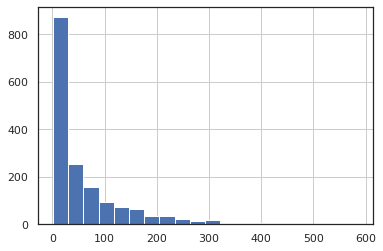

In [13]:
rating_df['Rating_Count'].hist(bins = 20)

<AxesSubplot:>

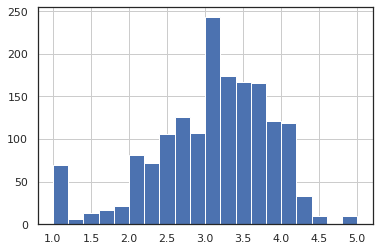

In [14]:
rating_df['Rating'].hist(bins = 20)

*Most of the movies are given an average rating of 3.0*

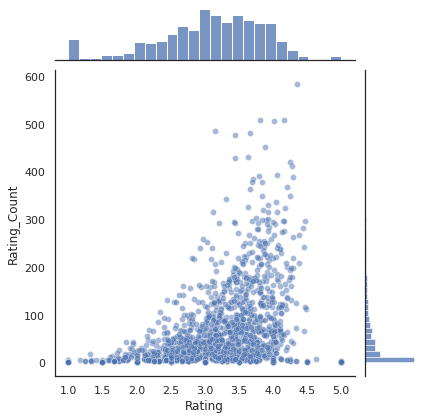

In [15]:
sns.jointplot(x = 'Rating',y = 'Rating_Count', data = rating_df , alpha = 0.5)

*The movies that are most watched also have high rating*

**Collaborative Filtering Recommendation Engines**    
Focusing on the ratings given by the similar users     
Identifing the similar users    
Taking the weighted average of the movies watched by other users      
Most similar movies or movies predicted to be given the most ratings can be filtered and provided as recommended movies

##### Recommending Similar Movies using ***Collaborative Filtering***

Create a matrix that has User_IDs on one axis and the Movie_Title on another axis.    
Each cell will then consist of the rating the user has given to a movie.       
NaN values are because most people have not seen most of the movies.

In [16]:
info_df.columns

Index(['User_ID', 'Movie_ID', 'Rating', 'Timestamp', 'Movie_Title'], dtype='object')

In [17]:
movie_matrix = info_df.pivot_table(index = 'User_ID', columns = 'Movie_Title', values = 'Rating')
movie_matrix.head()

Movie_Title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
User_ID,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
#Top 5 most frequently rated movies  
rating_df.sort_values('Rating_Count', ascending = False).head()

,Rating,Rating_Count
Movie_Title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485


Selecting 2 Movies for our system    
Star Wars : A Sci-fi Movie   
Liar Liar : A Comedy

*What are the user ratings for the 2 movies*

In [19]:
def recommendMovies(name, min_rating_count = 50):#selecting only those movies which have been rated atleast 50 times
    user_rating = movie_matrix[name]
    similar_movies = movie_matrix.corrwith(user_rating)
    corr_movies = pd.DataFrame(similar_movies, columns = ['Correlation'])
    corr_movies.dropna(inplace=True)
    #Joining the Rating_Count list to filter based on minimum count of ratings to be considered for recommending a movie
    corr_movies = corr_movies.join(rating_df['Rating_Count'], how = 'left', lsuffix='_left', rsuffix = '_right')
    
    final = corr_movies[corr_movies['Rating_Count']>min_rating_count].sort_values('Correlation', ascending=False)
    return final

In [20]:
recommendations = recommendMovies('Contact (1997)')
print("\n The recommended movies based on similar ratings given by users are ")
recommendations.head()

/opt/conda/lib/python3.7/site-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/opt/conda/lib/python3.7/site-packages/numpy/lib/function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)



 The recommended movies based on similar ratings given by users are 


,Correlation,Rating_Count
Movie_Title,,
Contact (1997),1.000000,509
Tin Men (1987),0.689929,51
Nell (1994),0.549230,81
Tales from the Crypt Presents: Bordello of Blood (1996),0.540568,55
"Spitfire Grill, The (1996)",0.528615,97
